# Initial exploration
June 2018

## Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

## Loading/examining data

In [216]:
#load or update twitter_analysis module
if 'twitter_analysis' in sys.modules:
    del sys.modules['twitter_analysis'] 
from twitter_analysis import *

In [172]:
#Load data
#convert datetime to appropriate format
#add column 'hours' which is the datetime as a float, in units of hours
df = prep_data()

In [27]:
print(df.shape)

(86347, 9)


In [28]:
print(df.loc[0,:])

campaign_id                                   3
datetime             2018-04-24 04:55:28.976000
campaign_spend                          34.5653
campaign_budget                            1000
matched_targeting           ['LANGUAGE', 'GEO']
objective                          APP_INSTALLS
charged                                       0
seen_by_user                              False
bid                                         1.5
Name: 0, dtype: object


In [31]:
print([type(item) for item in df.loc[0,:]])

[<class 'numpy.int64'>, <class 'str'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'str'>, <class 'str'>, <class 'numpy.float64'>, <class 'numpy.bool_'>, <class 'numpy.float64'>]


In [86]:
df['campaign_id'].value_counts()

1    25719
4    17753
2    17474
3    13204
7     7997
5     2507
6     1693
Name: campaign_id, dtype: int64

# Campaign spend

In [118]:
#load or update twitter_analysis module
if 'twitter_analysis' in sys.modules:
    del sys.modules['twitter_analysis'] 
from twitter_analysis import *

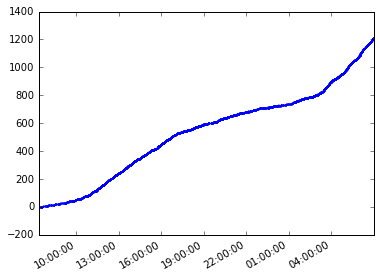

In [274]:
#First question: spend vs time
spendvtime(df,2)

The way the dates gets formatted automatically is pretty annoying.
But the date is dense enough that I don't need to bother with the scatter plot.

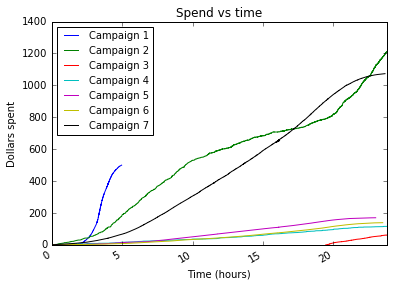

In [217]:
#now plot all the campaigns together
spendvtime_all(df)

# Campaign Info

In [268]:
#Let's create a table of information about the unique campaigns
campaigns = pd.DataFrame(index=range(1,8))
campaigns['budget'] = [df[df['campaign_id']==i]['campaign_budget'].iloc[0] for i in range(1,8)]
campaigns['total spent'] = [df[df['campaign_id']==i]['campaign_spend'].iloc[-1] for i in range(1,8)]
campaigns['bid'] = [df[df['campaign_id']==i]['bid'].iloc[0] for i in range(1,8)]
campaigns['objective'] = [df[df['campaign_id']==i]['objective'].iloc[0] for i in range(1,8)]
campaigns['targeting'] = [df[df['campaign_id']==i]['matched_targeting'].iloc[0] for i in range(1,8)]

In [269]:
campaigns

,budget,total spent,bid,objective,targeting
1,500.00,499.412728,7.50,WEBSITE_CLICKS,GEO
2,3550.00,1210.169699,1.15,WEBSITE_CLICKS,NaN
3,1000.00,61.002298,1.50,APP_INSTALLS,"['LANGUAGE', 'GEO']"
4,1167.00,115.240681,1.00,APP_INSTALLS,"['GEO', 'GENDER']"
5,170.00,169.471740,0.50,VIDEO_VIEWS,"['AGE_BUCKET', 'GEO']"
6,138.89,138.453629,0.05,VIDEO_VIEWS,"['AGE_BUCKET', 'GEO']"
7,1075.00,1073.198580,0.50,VIDEO_VIEWS,['GEO']


# Engagement

Next I'll look at the engagement rate, defined as the rate at which a chargeable impression occurs.

This definition is a little unclear to me.  At first I thought it was the rate over time, but it would make more sense if it was referring to the number of charged impressions divided by the number of seen impressions.

In [227]:
#load or update twitter_analysis module
if 'twitter_analysis' in sys.modules:
    del sys.modules['twitter_analysis'] 
from twitter_analysis import *

Here was my first calculation, looking at the number of charges per hour.  Not all charges are even included in the data, so instead I estimated it from the number of seen impressions.

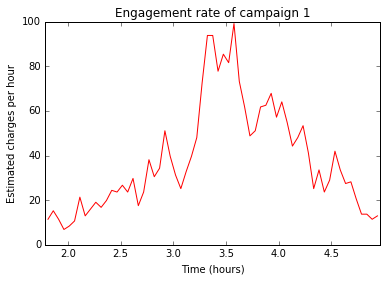

In [224]:
engagementvtime2(df,1)

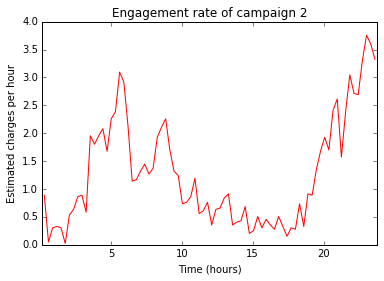

In [225]:
engagementvtime2(df,2)

Now to calculate the real engagement rate, defined as the number of charges per seen impression.  This is much easier.

In [228]:
print(engagement_rate(df,1))

0.0384615384615


In [270]:
campaigns['engagement'] = np.zeros(7)
for i in range(1,8):
    campaigns.loc[i,'engagement'] = engagement_rate(df,i)

In [272]:
#could estimate ECPI too from this
campaigns['ECPI'] = np.zeros(7)
for i in range(1,8):
    campaigns['ECPI'] = campaigns['bid']*campaigns['engagement']

In [273]:
campaigns

,budget,total spent,bid,objective,targeting,engagement,ECPI
1,500.00,499.412728,7.50,WEBSITE_CLICKS,GEO,0.038462,0.288462
2,3550.00,1210.169699,1.15,WEBSITE_CLICKS,NaN,0.007496,0.008621
3,1000.00,61.002298,1.50,APP_INSTALLS,"['LANGUAGE', 'GEO']",0.025210,0.037815
4,1167.00,115.240681,1.00,APP_INSTALLS,"['GEO', 'GENDER']",0.003472,0.003472
5,170.00,169.471740,0.50,VIDEO_VIEWS,"['AGE_BUCKET', 'GEO']",0.338462,0.169231
6,138.89,138.453629,0.05,VIDEO_VIEWS,"['AGE_BUCKET', 'GEO']",0.219436,0.010972
7,1075.00,1073.198580,0.50,VIDEO_VIEWS,['GEO'],0.348185,0.174092


# Rate of seen ads

In [284]:
#Given that an ad gets served, how likely is it to be seen?
campaigns['ads seen'] = np.zeros(7)
for i in range(1,8):
    campaigns.loc[i,'ads seen'] = np.sum(df[df['campaign_id'] == i]['seen_by_user']) / np.sum(df['campaign_id'] == i)

In [285]:
campaigns

,budget,total spent,bid,objective,targeting,engagement,ECPI,ads seen
1,500.00,499.412728,7.50,WEBSITE_CLICKS,GEO,0.038462,0.288462,0.123333
2,3550.00,1210.169699,1.15,WEBSITE_CLICKS,NaN,0.007496,0.008621,0.229026
3,1000.00,61.002298,1.50,APP_INSTALLS,"['LANGUAGE', 'GEO']",0.025210,0.037815,0.036050
4,1167.00,115.240681,1.00,APP_INSTALLS,"['GEO', 'GENDER']",0.003472,0.003472,0.064890
5,170.00,169.471740,0.50,VIDEO_VIEWS,"['AGE_BUCKET', 'GEO']",0.338462,0.169231,0.181492
6,138.89,138.453629,0.05,VIDEO_VIEWS,"['AGE_BUCKET', 'GEO']",0.219436,0.010972,0.188423
7,1075.00,1073.198580,0.50,VIDEO_VIEWS,['GEO'],0.348185,0.174092,0.227335


# Discussion

One thing we can see from the table above, is that engagement rates are about 10 times higher for video views than for website clicks or app installs.  Accordingly, the amount they need to bid should be about 10 times smaller, if they are to compete in the same market.

I also see that most campaigns budget for about 1000-3000 clicks/views/installs per day.  Campaign 1 and 5 are outliers in this respect.  I wouldn't be surprised if this is the result of an anchoring effect (ie Twitter suggests budgeting for 1000 engagements per day, and clients adjust their expectations based on that).



Finally, I look at the pacing of each campaign.  It seems that most campaigns either spend their whole budget, or only spend a tiny fraction (with the exception of campaign 2).  You might say that some campaigns have "won" the auction, and others have "lost".  Interestingly, this seems related to the ECPI, but isn't completely determined by it (eg campaign 6 spends most of its budget despite a really low ECPI).  Actually I suppose this isn't the real ECPI, since it only uses data from auctions they actually won.